<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Ejercicio_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripcion del ejercicio

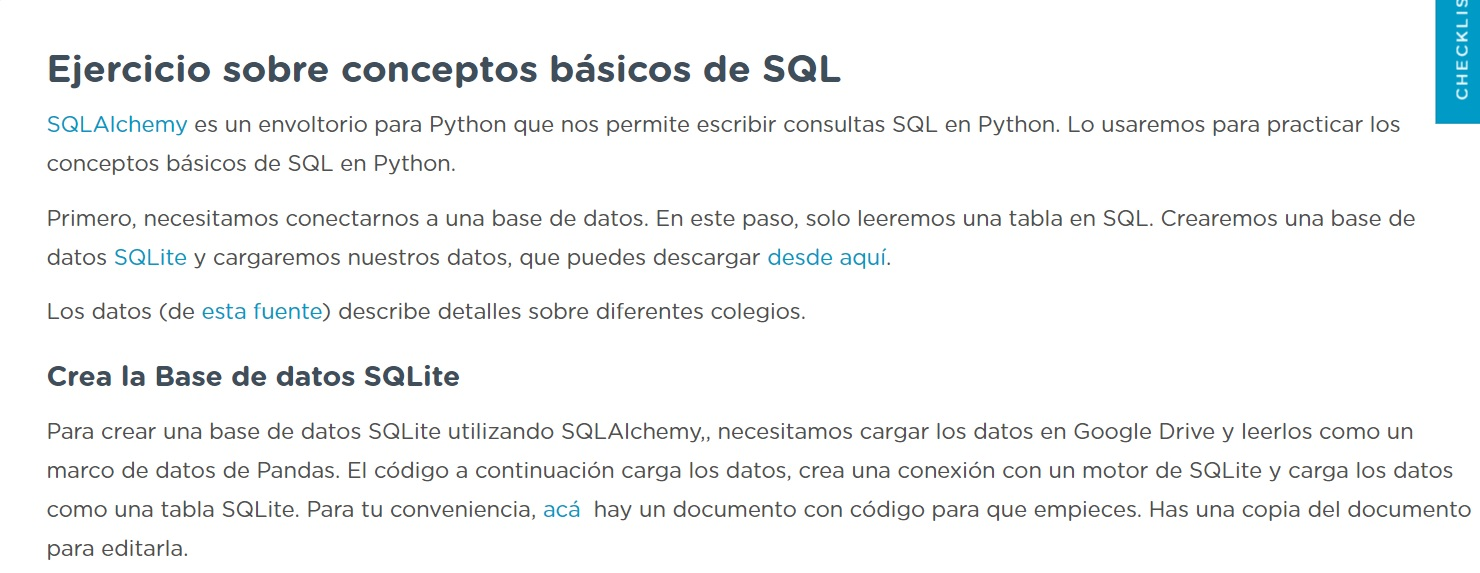

# Librerias 

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Montaje drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Montaje dataset

In [78]:
school = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Machine Learning Avanzado/School_Details.csv')
school = school.rename(columns={"DistrictHQDistance (in Km)":"DistrictHQDistance","CRCDistance (in Km)":"CRCDistance","BACDistance (in Km)":"BACDistance"})
school.head(2)


,DistrictName,EstablishmentCode,EstablishmentName,BRCName,CRCName,SchoolLevel,ManagementName,LocalityHabitation,SubdivisionName,ConstituencyName,RevenueBlockName,CivicBodyName,WardName,PostOfficeName,PhoneNo,FaxNo,EmailID,Website,LocatedInRuralOrUrban,DiseCode,EstablishedDate,DistrictHQDistance,CRCDistance,BACDistance,IsRecognized,RecognizedBy,ContactPersonName,LowestClass,HighestClass,BoardName
0,East,S0169,BUDANG GOVERNMENT PRIMARY SCHOOL (E),Duga Brc,Central Pendam Government Senior Secondary School,PS,State Govt.,BUDANG,Gangtok,Rhenock,Central Pendam,Central Pendam,Sajong,Upper Pendam,NaN,NaN,NaN,NaN,Urban Area,NaN,28126,58.0,8.0,16.0,Recognized,HRDD,NaN,Class 1,Class 5,NaN
1,East,S0099,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,Duga Brc,Central Pendam Government Senior Secondary School,SSS,State Govt.,CENTRAL PENDAM,Gangtok,West Pandam,Central Pendam,Central Pendam,Karmithang,Upper Pendam,3592263812,NaN,NaN,NaN,Urban Area,800401,15342,50.0,0.0,6.0,Recognized,HRDD,NaN,Class 1,Class 12,C.B.S.E.


# Creacion Motor SQL

In [82]:
# crear motor sqlite
engine = create_engine('sqlite:///school.db', echo=True)
# crear conexión con el motor
conn = engine.connect()

# Agregar marco de datos como una tabla en sqlite

In [84]:
sqlite_table = "school_details1"
school.to_sql(sqlite_table, conn, if_exists='fail')

2021-11-02 19:49:55,319 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("school_details1")
2021-11-02 19:49:55,321 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-02 19:49:55,328 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("school_details1")
2021-11-02 19:49:55,329 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-11-02 19:49:55,341 INFO sqlalchemy.engine.Engine 
CREATE TABLE school_details1 (
	"index" BIGINT, 
	"DistrictName" TEXT, 
	"EstablishmentCode" TEXT, 
	"EstablishmentName" TEXT, 
	"BRCName" TEXT, 
	"CRCName" TEXT, 
	"SchoolLevel" TEXT, 
	"ManagementName" TEXT, 
	"LocalityHabitation" TEXT, 
	"SubdivisionName" TEXT, 
	"ConstituencyName" TEXT, 
	"RevenueBlockName" TEXT, 
	"CivicBodyName" TEXT, 
	"WardName" TEXT, 
	"PostOfficeName" TEXT, 
	"PhoneNo" TEXT, 
	"FaxNo" TEXT, 
	"EmailID" TEXT, 
	"Website" TEXT, 
	"LocatedInRuralOrUrban" TEXT, 
	"DiseCode" TEXT, 
	"EstablishedDate" TEXT, 
	"DistrictHQDistance" FLOAT, 
	"CRCDistance" FLOAT, 
	"BACDistance" FLOAT, 
	"IsReco

# Llama las columnas NombreEstablecimiento, NivelEscolar y SitioWeb.

In [85]:
sql = """
SELECT EstablishmentName, SchoolLevel, Website
FROM school_details1
"""
df = pd.read_sql_query(sql, engine)
df.head()

2021-11-02 19:50:06,992 INFO sqlalchemy.engine.Engine 
SELECT EstablishmentName, SchoolLevel, Website
FROM school_details1

2021-11-02 19:50:06,997 INFO sqlalchemy.engine.Engine [raw sql] ()


,EstablishmentName,SchoolLevel,Website
0,BUDANG GOVERNMENT PRIMARY SCHOOL (E),PS,None
1,CENTRAL PENDAM GOVERNMENT SENIOR SECONDARY SCHOOL,SSS,None
2,"CENTRAL POINT ACADEMY, CENTRAL PENDAM",SS,www.facebook.com/khanalkeshav (Group-CPA)
3,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),JHS,None
4,DUGA GOVERNMENT SECONDARY SCHOOL,SS,None


# Muestra el NombreEstablecimiento y DistanciaDistrito (en km) de colegios en los que DistanciaDistrito (en km) es más de 100 km.0

In [87]:
sql1 = """
SELECT EstablishmentName, DistrictHQDistance
FROM school_details1
WHERE DistrictHQDistance > 100
"""
df = pd.read_sql_query(sql1, engine)
df.head()

2021-11-02 19:50:36,399 INFO sqlalchemy.engine.Engine 
SELECT EstablishmentName, DistrictHQDistance
FROM school_details1
WHERE DistrictHQDistance > 100

2021-11-02 19:50:36,411 INFO sqlalchemy.engine.Engine [raw sql] ()


,EstablishmentName,DistrictHQDistance
0,DODACHEN GOVERNMENT PRIMARY SCHOOL,150.0
1,DEOLING GOVERNMENT PRIMARY SCHOOL,107.0
2,PEMA TSEL ACADEMY(PHADAMCHEN),110.0
3,ZULUCK GOVERNMENT PRIMARY SCHOOL,120.0
4,BHARENG GOVERNMENT PRIMARY SCHOOL,150.0


# Muestra NombreEstablecimiento, NivelEscolar, DistanciaDistrito (en km) de colegios donde el nivel escolar es Junior High School.


In [90]:
sql1 = """
SELECT EstablishmentName,SchoolLevel,DistrictHQDistance
FROM school_details1
WHERE SchoolLevel ="JHS"
"""
df = pd.read_sql_query(sql1, engine)
df.head()

2021-11-02 20:11:01,298 INFO sqlalchemy.engine.Engine 
SELECT EstablishmentName,SchoolLevel,DistrictHQDistance
FROM school_details1
WHERE SchoolLevel ="JHS"

2021-11-02 20:11:01,301 INFO sqlalchemy.engine.Engine [raw sql] ()


,EstablishmentName,SchoolLevel,DistrictHQDistance
0,CHEURIBOTEY GOVERNMENT JUNIOR HIGH SCHOOL (E),JHS,60.0
1,"PADMA KUMARI PUBLIC SCHOOL, DUGA",JHS,48.0
2,SAJONG GOVERNMENT JUNIOR HIGH SCHOOL,JHS,57.0
3,SINGLEYBONG GOVERNMENT JUNIOR HIGH SCHOOL,JHS,38.0
4,"SUNRISE ACADEMY, DUGA",JHS,47.0


# Muestra NombreEstablecimiento, NivelEscolar, DistanciaDistrito (en km) de colegios que contengan las palabras “Junior High” en su nombre.

In [94]:
sql1 = """
SELECT EstablishmentName,SchoolLevel,DistrictHQDistance
FROM school_details1
WHERE EstablishmentName = "Junior High"
"""
df = pd.read_sql_query(sql1, engine)
df.head()

2021-11-02 20:16:40,564 INFO sqlalchemy.engine.Engine 
SELECT EstablishmentName,SchoolLevel,DistrictHQDistance
FROM school_details1
WHERE EstablishmentName = "Junior High"

2021-11-02 20:16:40,567 INFO sqlalchemy.engine.Engine [raw sql] ()


,EstablishmentName,SchoolLevel,DistrictHQDistance


# Muestra NombreEstablecimiento, NivelEscolar, DistanciaDistrito (en km) de colegios cuyo nombre comience con la letra “C”. Ordena los resultados de forma alfabética por nombre de colegio  y limita los resultados de la consulta a 10 líneas.